In [57]:
# 🧮 NumPy y pandas
import numpy as np
import pandas as pd

# 📊 Visualización
import matplotlib.pyplot as plt

# 🔧 Utilidades generales
import heapq
import time

# 📦 Preprocesamiento y transformación
from sklearn import preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import (
    RobustScaler,
    OneHotEncoder,
    MinMaxScaler,
    StandardScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 📊 Reducción de dimensionalidad
from sklearn.decomposition import PCA

# 🤖 Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

# 🧪 Model selection
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    GridSearchCV
)

# 📈 Métricas
from sklearn import metrics
from sklearn.metrics import (
    balanced_accuracy_score,
    confusion_matrix,
    accuracy_score,
    recall_score
)



In [58]:
pd.set_option("display.max_rows", None)  # Muestra todas las filas
pd.set_option("display.max_columns", None)  # Muestra todas las columnas
pd.set_option("display.max_colwidth", None)  # No truncar texto en celdas


# Cargar el CSV en un DataFrame
df = pd.read_csv("semillas.csv")

In [59]:
variable_objetivo = "clase"

X = df.drop(columns=[variable_objetivo])  
y = df[variable_objetivo]  

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=432094)

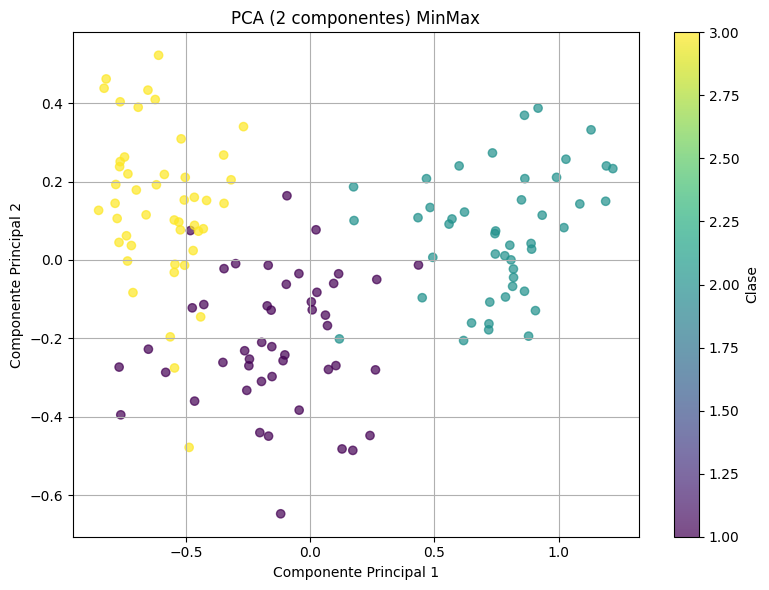

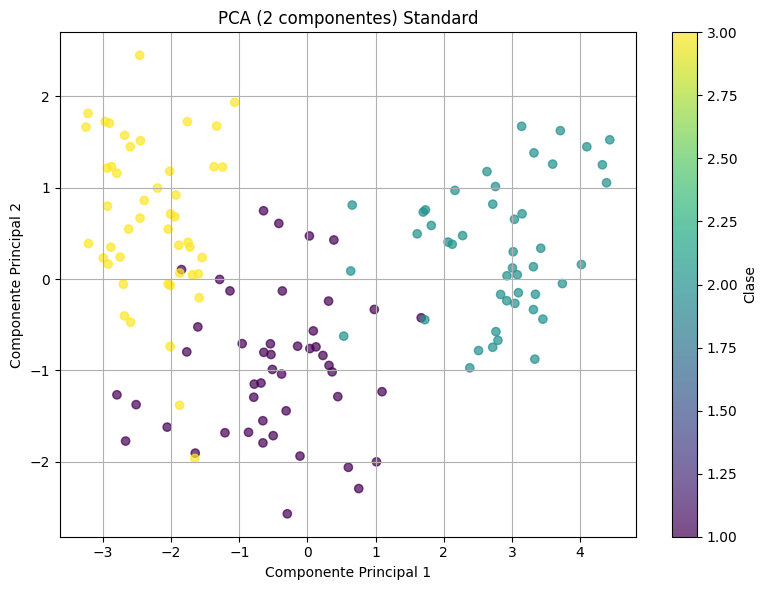

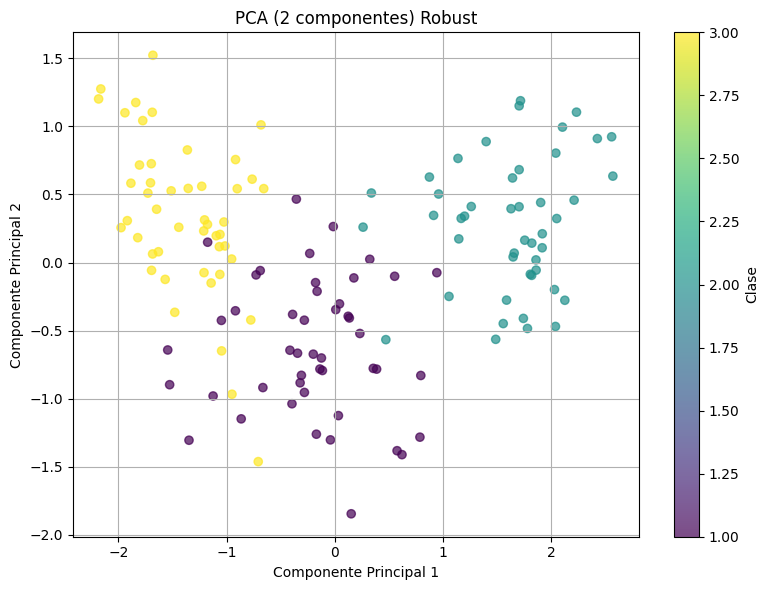

In [68]:
scaling_methods = {
    "MinMax": MinMaxScaler(),
    "Standard": StandardScaler(),
    "Robust": RobustScaler()
}

for scale_name, scaler in scaling_methods.items():

# Crear pipeline con MinMaxScaler y PCA a 2 componentes
    clf_pca = Pipeline(steps=[
        ('scaler', scaler),
        ('pca', PCA(n_components=2))
    ])

    # Aplicar transformación
    X_pca = clf_pca.fit_transform(X_train)

    # Visualizar
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
    plt.title('PCA (2 componentes) '+ scale_name)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.colorbar(scatter, label='Clase')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Aquí se puede observar que MinMax es el que mejor separa los datos, con menos datos mezclados